# Import packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
%matplotlib inline
from matplotlib import rcParams
rcParams["axes.formatter.useoffset"] = False
rcParams['axes.formatter.limits'] = -15,15
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['xtick.direction']='in'
rcParams['ytick.direction']='in'
import sys
sys.path.pop(0)

'/Users/gks/Dropbox/mypylib/notebooks/GIT'

# Lets import our package 

In [2]:
import rmfit
rmfit

<module 'rmfit' from '/Users/gks/opt/anaconda2/envs/py36/lib/python3.6/site-packages/rmfit-0.1.0-py3.6.egg/rmfit/__init__.py'>

# Lets test it on a dataset with an RV variation + RM effect 

In [3]:
df = pd.read_csv('../data/example/01_hatp2/albrecht2012.csv',comment='#',sep=';')
df.name.unique()
df = df[df.name=='HAT-P-2'].reset_index(drop=True)
df

,name,bjd,rv,f_RVel,e_rv,inst
0,HAT-P-2,2.454258e+06,107.29,NaN,11.47,HIRES
1,HAT-P-2,2.454258e+06,113.38,NaN,11.27,HIRES
2,HAT-P-2,2.454258e+06,102.73,NaN,11.29,HIRES
3,HAT-P-2,2.454258e+06,73.36,NaN,11.12,HIRES
4,HAT-P-2,2.454258e+06,72.43,NaN,10.98,HIRES
...,...,...,...,...,...,...
92,HAT-P-2,2.454258e+06,-278.41,NaN,10.80,HIRES
93,HAT-P-2,2.454258e+06,-297.41,NaN,10.85,HIRES
94,HAT-P-2,2.454258e+06,-350.56,NaN,11.02,HIRES
95,HAT-P-2,2.454258e+06,-352.35,NaN,11.08,HIRES


Text(0, 0.5, 'RV [m/s]')

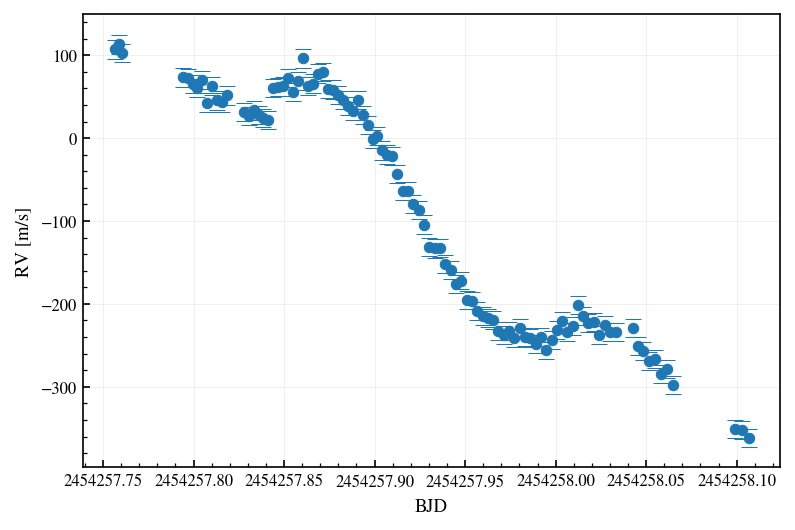

In [4]:
fig, ax = plt.subplots(dpi=150)
ax.errorbar(df.bjd.values,df.rv,df.e_rv,marker='o',lw=0,mew=0.5,capsize=4)
rmfit.utils.ax_apply_settings(ax,ticksize=8)
ax.set_xlabel('BJD')
ax.set_ylabel('RV [m/s]')

### Read priors from file 

In [5]:
f = '../data/example/01_hatp2/hatp2_priors.dat'
L = rmfit.rmfit.LPFunction(df.bjd.values,df.rv.values,df.e_rv.values,f)
TF = rmfit.rmfit.RMFit(L)

Reading in priorfile from ../data/example/01_hatp2/hatp2_priors.dat
UPDATE5
   prior          arg1       arg2     label description priortype  fixed
0     NP  2.454213e+06    0.00060     t0_p1       t0_p1     model  False
1     NP  5.633410e+00    0.00013      P_p1        P_p1     model  False
2     UP -1.800000e+02  180.00000    lam_p1      lam_p1     model  False
3     UP  0.000000e+00   30.00000     vsini       vsini     model  False
4     UP  8.500000e+01   90.00000    inc_p1      inc_p1     model  False
5     NP  7.227000e-02    0.00070      p_p1        p_p1     model  False
6     NP  9.000000e+00    3.00000      a_p1        a_p1     model  False
7     NP  3.000000e-01    0.05000        u1          u1     model  False
8     NP  3.000000e-01    0.05000        u2          u2     model  False
9     UP -4.000000e+02  400.00000     gamma       gamma     model  False
10    NP  5.010000e-01    0.00700    ecc_p1      ecc_p1     model  False
11    NP -1.726000e+02    1.60000  omega_p1    o

In [6]:
TF.minimize_PyDE(mcmc=False)

Running PyDE Optimizer
Optimized using PyDE
Final parameters:
      labels       centers         lower         upper            pv  center_dist
0      t0_p1  2.454213e+06  2.454213e+06  2.454213e+06  2.454213e+06    -0.000161
1       P_p1  5.633410e+00  5.632760e+00  5.634060e+00  5.633311e+00     0.000099
2     lam_p1  0.000000e+00 -1.800000e+02  1.800000e+02 -1.995895e+00     1.995895
3      vsini  1.500000e+01  0.000000e+00  3.000000e+01  1.684068e+01    -1.840678
4     inc_p1  8.750000e+01  8.500000e+01  9.000000e+01  8.903359e+01    -1.533587
5       p_p1  7.227000e-02  6.877000e-02  7.577000e-02  7.305924e-02    -0.000789
6       a_p1  9.000000e+00 -6.000000e+00  2.400000e+01  1.074129e+01    -1.741286
7         u1  3.000000e-01  5.000000e-02  5.500000e-01  3.219320e-01    -0.021932
8         u2  3.000000e-01  5.000000e-02  5.500000e-01  2.572980e-01     0.042702
9      gamma  0.000000e+00 -4.000000e+02  4.000000e+02  3.682070e+02  -368.207046
10    ecc_p1  5.010000e-01  4.660000

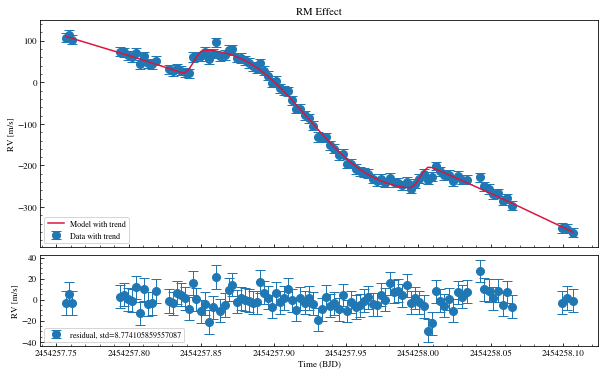

In [7]:
# 
TF.plot_lc(TF.min_pv)

In [8]:
f = '../data/example/01_hatp2/hatp2_priors.dat'
L = rmfit.rmfit.LPFunction(df.bjd.values,df.rv.values,df.e_rv.values,f)
TF = rmfit.rmfit.RMFit(L)
TF.minimize_PyDE(mcmc=True,mc_iter=500)

Reading in priorfile from ../data/example/01_hatp2/hatp2_priors.dat
UPDATE5
   prior          arg1       arg2     label description priortype  fixed
0     NP  2.454213e+06    0.00060     t0_p1       t0_p1     model  False
1     NP  5.633410e+00    0.00013      P_p1        P_p1     model  False
2     UP -1.800000e+02  180.00000    lam_p1      lam_p1     model  False
3     UP  0.000000e+00   30.00000     vsini       vsini     model  False
4     UP  8.500000e+01   90.00000    inc_p1      inc_p1     model  False
5     NP  7.227000e-02    0.00070      p_p1        p_p1     model  False
6     NP  9.000000e+00    3.00000      a_p1        a_p1     model  False
7     NP  3.000000e-01    0.05000        u1          u1     model  False
8     NP  3.000000e-01    0.05000        u2          u2     model  False
9     UP -4.000000e+02  400.00000     gamma       gamma     model  False
10    NP  5.010000e-01    0.00700    ecc_p1      ecc_p1     model  False
11    NP -1.726000e+02    1.60000  omega_p1    o

No flatchain passed, defaulting to using full chains


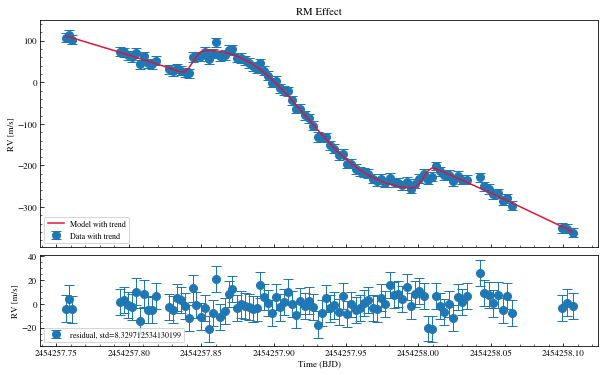

In [9]:
# Plot the MCMC fit
TF.plot_lc_mcmc_fit()

In [10]:
# The min values are recorded in the following attribute
TF.min_pv_mcmc

array([ 2.45421286e+06,  5.63343185e+00,  7.68294630e+00,  1.68491538e+01,
        8.91505249e+01,  7.23070019e-02,  1.05070768e+01,  3.54215576e-01,
        3.32672565e-01,  3.65948621e+02,  4.95022239e-01, -1.70536962e+02,
        4.98418424e+00,  9.19652398e+02])

## Plot chains 

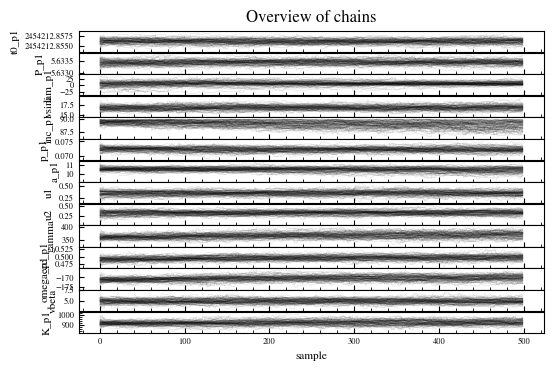

In [11]:
rmfit.mcmc_help.plot_chains(TF.sampler.chain,labels=TF.lpf.ps_vary.labels)

## Plot corner

In [25]:
# Make flatchain and posteriors
burnin_index = 200
chains_after_burnin = TF.sampler.chain[:,burnin_index:,:]
flatchain = chains_after_burnin.reshape((-1,len(TF.lpf.ps_vary.priors)))
df_post = pd.DataFrame(flatchain,columns=TF.lpf.ps_vary.labels)
df_post

,t0_p1,P_p1,lam_p1,vsini,inc_p1,p_p1,a_p1,u1,u2,gamma,ecc_p1,omega_p1,vbeta,K_p1
0,2.454213e+06,5.633410,3.313288,16.354291,89.161822,0.072930,10.145094,0.384238,0.321675,359.921648,0.492546,-172.988201,5.155629,907.629268
1,2.454213e+06,5.633410,3.313288,16.354291,89.161822,0.072930,10.145094,0.384238,0.321675,359.921648,0.492546,-172.988201,5.155629,907.629268
2,2.454213e+06,5.633410,3.313288,16.354291,89.161822,0.072930,10.145094,0.384238,0.321675,359.921648,0.492546,-172.988201,5.155629,907.629268
3,2.454213e+06,5.633410,3.313288,16.354291,89.161822,0.072930,10.145094,0.384238,0.321675,359.921648,0.492546,-172.988201,5.155629,907.629268
4,2.454213e+06,5.633410,3.313288,16.354291,89.161822,0.072930,10.145094,0.384238,0.321675,359.921648,0.492546,-172.988201,5.155629,907.629268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2.454213e+06,5.633484,14.252149,16.296722,89.581228,0.072375,10.495645,0.388760,0.292074,364.498572,0.493926,-170.935477,4.488429,919.258919
29996,2.454213e+06,5.633484,14.252149,16.296722,89.581228,0.072375,10.495645,0.388760,0.292074,364.498572,0.493926,-170.935477,4.488429,919.258919
29997,2.454213e+06,5.633484,14.252149,16.296722,89.581228,0.072375,10.495645,0.388760,0.292074,364.498572,0.493926,-170.935477,4.488429,919.258919
29998,2.454213e+06,5.633484,14.297040,16.295484,89.581349,0.072375,10.495068,0.388850,0.292041,364.488715,0.493963,-170.940078,4.485447,919.156129


In [27]:
# Assess convergence, should be close to 1 (usually within a few percent, if not, then rerun MCMC with more steps)
# This example for example would need a lot more steps, but keeping steps fewer for a quick minimal example
# Usually good to let it run for 10000 - 20000 steps for a 'production run'
rmfit.mcmc_help.gelman_rubin(chains_after_burnin)

array([1.36478712, 1.41511556, 1.4988872 , 1.35971255, 1.41866628,
       1.36446521, 1.39137128, 1.40226277, 1.32663522, 1.38187337,
       1.36907389, 1.45418584, 1.3600544 , 1.46122763])

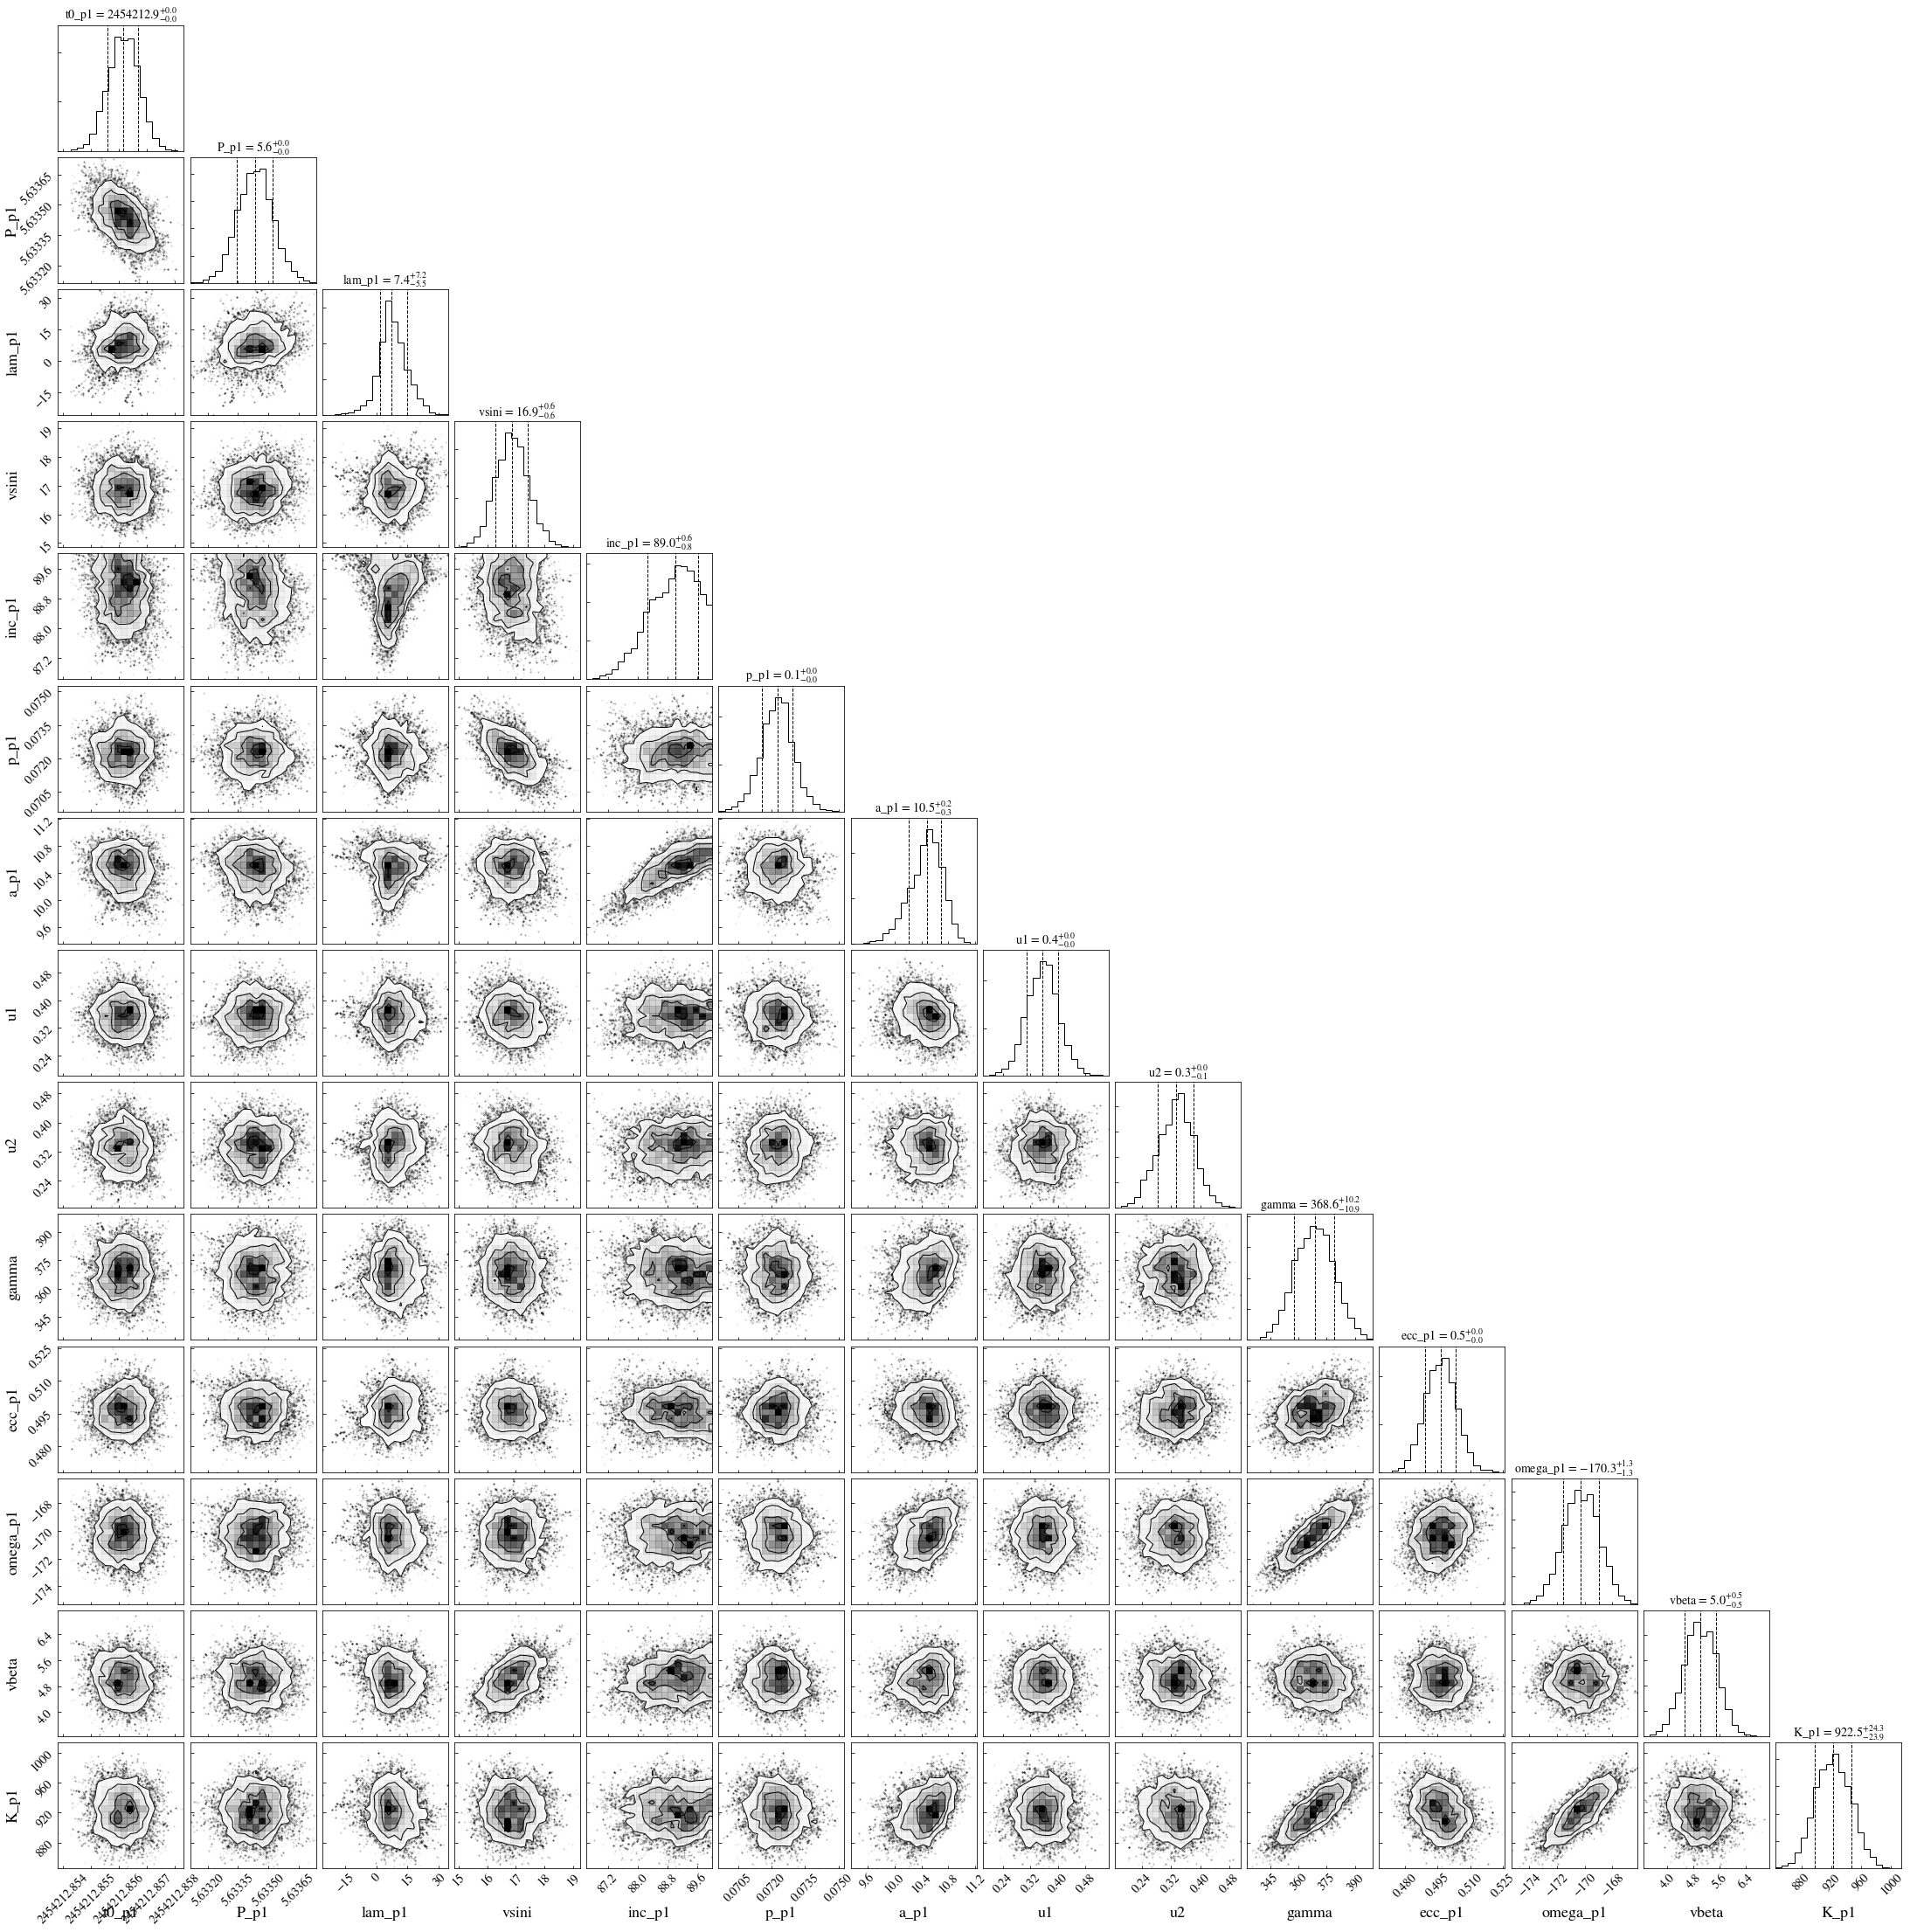

In [29]:
# Plot corner plot
fig = rmfit.mcmc_help.plot_corner(chains_after_burnin,
       show_titles=True,labels=np.array(TF.lpf.ps_vary.descriptions),title_fmt='.1f',xlabcord=(0.5, -0.2))

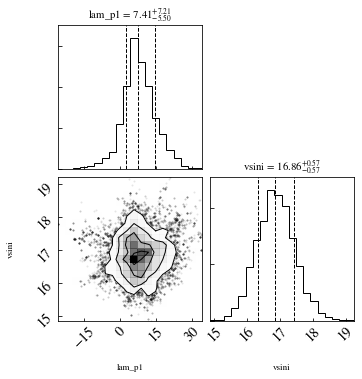

In [30]:
# Narrow down on the lambda and vsini
import corner
fig = corner.corner(df_post[['lam_p1','vsini']],show_titles=True,quantiles=[0.18,0.5,0.84])

In [32]:
# Print median values
df_medvals = TF.get_mean_values_mcmc_posteriors(df_post.values)
df_medvals

,medvals,minus,plus,values,Labels,Description
0,2.454213e+06,0.000571,0.000543,$2454212.85615_{-0.00057}^{+0.00054}$,t0_p1,t0_p1
0,5.633436e+00,0.000090,0.000087,$5.633436_{-0.00009}^{+0.00009}$,P_p1,P_p1
0,7.414083e+00,5.498405,7.208262,$7.4_{-5.5}^{+7.2}$,lam_p1,lam_p1
0,1.685699e+01,0.571260,0.565406,$16.86_{-0.57}^{+0.57}$,vsini,vsini
0,8.901344e+01,0.762716,0.604498,$89.01_{-0.76}^{+0.60}$,inc_p1,inc_p1
0,7.226537e-02,0.000718,0.000683,$0.07227_{-0.00072}^{+0.00068}$,p_p1,p_p1
0,1.048861e+01,0.275773,0.207322,$10.49_{-0.28}^{+0.21}$,a_p1,a_p1
0,3.557259e-01,0.046635,0.044303,$0.356_{-0.047}^{+0.044}$,u1,u1
0,3.347461e-01,0.051806,0.045945,$0.335_{-0.052}^{+0.046}$,u2,u2
0,3.686453e+02,10.905849,10.211673,$369.0_{-11.0}^{+10.0}$,gamma,gamma


# Plotting resulting MCMC fit 

Sampling, i= 0
Sampling, i= 100
Sampling, i= 200
Sampling, i= 300


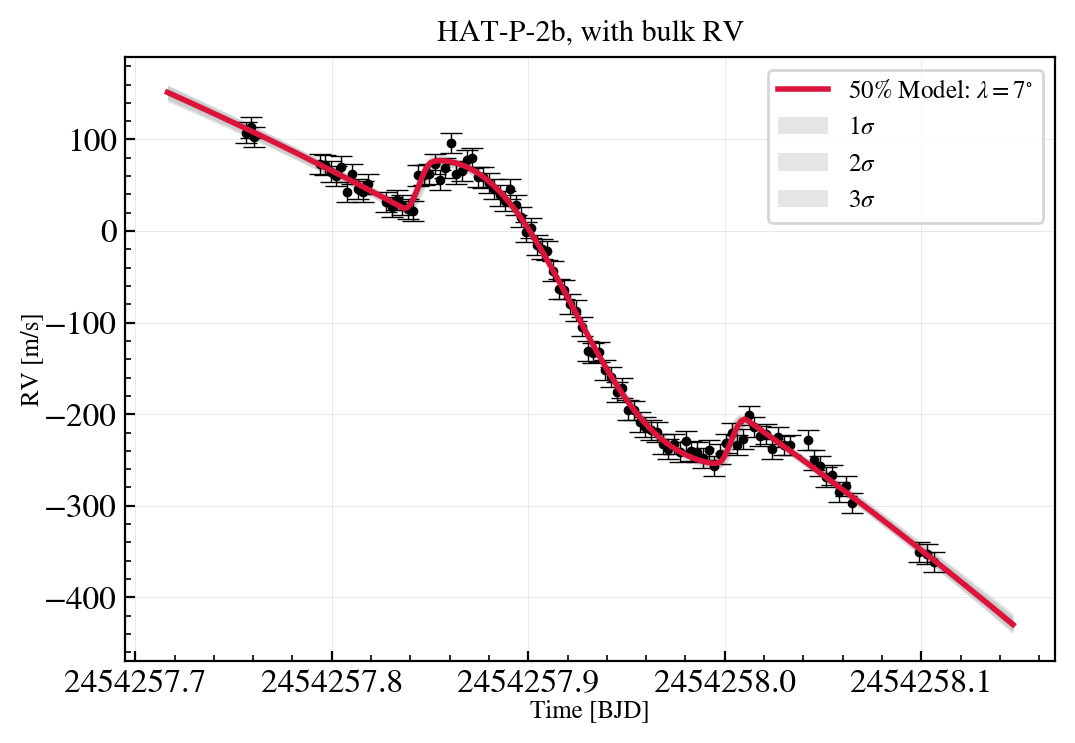

In [34]:
TITLE = 'HAT-P-2b, with bulk RV'
NUMMODELS = 400
shadecolor="black"

###################
times1 = np.linspace(TF.lpf.data['x'][0]-0.02,TF.lpf.data['x'][-1]+0.02,500)
pv_50 = np.percentile(flatchain,[50],axis=0)[0]
t1_mod = np.linspace(times1.min()-0.02,times1.max()+0.02,300)
rv_50 = TF.lpf.compute_total_model(pv_50,t1_mod)

# Plot random samples
fig, ax = plt.subplots(dpi=200)

#################
# Plot data
#################
markercolor="black"
ax.errorbar(TF.lpf.data['x'],TF.lpf.data['y'],TF.lpf.data['error'],
            marker='o',elinewidth=0.5,capsize=4,lw=0,mew=0.5,color=markercolor,markersize=3)
ax.plot(t1_mod,rv_50,color="crimson",
        label=r'50% Model: $\lambda=${:0.0f}'.format(pv_50[2])+'$^{\circ}$',lw=2.,zorder=10)

#################
# Sample models
#################
mmodel1 = []
for i in range(NUMMODELS):
    if i%100 == 0: print("Sampling, i=",i)
    idx = np.random.randint(0, flatchain.shape[0])
    m1 = TF.lpf.compute_total_model(flatchain[idx],times=t1_mod)
    mmodel1.append(m1)
mmodel1 = np.array(mmodel1)
#################

ax.fill_between(t1_mod,np.quantile(mmodel1,0.16,axis=0),np.quantile(mmodel1,0.84,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='1$\sigma$',zorder=-1)
ax.fill_between(t1_mod,np.quantile(mmodel1,0.02,axis=0),np.quantile(mmodel1,0.98,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='2$\sigma$',zorder=-1)
ax.fill_between(t1_mod,np.quantile(mmodel1,0.0015,axis=0),np.quantile(mmodel1,0.9985,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='3$\sigma$',zorder=-1)
ax.legend(loc='upper right')
ax.set_xlabel('Time [BJD]',labelpad=0)
ax.set_ylabel('RV [m/s]',labelpad=0)
ax.set_title(TITLE)
rmfit.utils.ax_apply_settings(ax)